In [1]:
import numpy as np
import pandas as pd

### Quiz_2
- 타이타닉 데이터를 가져와서 연령대별 생존률을 구하고 그래프를 그리세요

In [2]:
# 타이타닉 데이터 가져오기
titanic = pd.read_csv("train.csv")
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [3]:
# ["Survived","Age"] 컬럼을 가지는 titanic_df 데이터 프레임을 만들고 Age가 NaN인 row 데이터를 삭제

In [4]:
titanic_df1 = pd.DataFrame(titanic, columns = ["Survived", "Age"])
titanic_df1 = titanic_df1.dropna(axis = 0).reset_index()
titanic_df1.tail()

,index,Survived,Age
709,885,0,39.0
710,886,0,27.0
711,887,1,19.0
712,889,1,26.0
713,890,0,32.0


In [5]:
# Ages 컬럼을 만들고 Ages 컬럼에는 연령대에 대한 데이터 삽입

In [6]:
titanic_df1["Ages"] = titanic_df1.Age // 10 * 10
titanic_df1.tail()

,index,Survived,Age,Ages
709,885,0,39.0,30.0
710,886,0,27.0,20.0
711,887,1,19.0,10.0
712,889,1,26.0,20.0
713,890,0,32.0,30.0


In [7]:
# 연령대별로 생존률

In [22]:
titanic_df1["Count"] = 1
titanic_df2 = titanic_df1.pivot_table(values = "Count", index = ["Ages"], columns = ["Survived"], aggfunc = np.sum)

In [23]:
titanic_df2

Survived,0,1
Ages,,
0.0,24.0,38.0
10.0,61.0,41.0
20.0,143.0,77.0
30.0,94.0,73.0
40.0,55.0,34.0
50.0,28.0,20.0
60.0,13.0,6.0
70.0,6.0,NaN
80.0,NaN,1.0


In [24]:
titanic_df2["survived_rate"] = round((titanic_df2[1] / (titanic_df2[0] + titanic_df2[1])) * 100, 2)
titanic_df2

Survived,0,1,survived_rate
Ages,,,
0.0,24.0,38.0,61.29
10.0,61.0,41.0,40.20
20.0,143.0,77.0,35.00
30.0,94.0,73.0,43.71
40.0,55.0,34.0,38.20
50.0,28.0,20.0,41.67
60.0,13.0,6.0,31.58
70.0,6.0,NaN,NaN
80.0,NaN,1.0,NaN


In [25]:
titanic_df2.dropna()

Survived,0,1,survived_rate
Ages,,,
0.0,24.0,38.0,61.29
10.0,61.0,41.0,40.20
20.0,143.0,77.0,35.00
30.0,94.0,73.0,43.71
40.0,55.0,34.0,38.20
50.0,28.0,20.0,41.67
60.0,13.0,6.0,31.58


In [12]:
# 컬럼명을 변경하고 연령대별 생존, 사망, 생존률 그래프 그리기

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [28]:
titanic_df2.columns = ["non_survived", "survived", "survived_rate"]
titanic_df2

,non_survived,survived,survived_rate
Ages,,,
0.0,24.0,38.0,61.29
10.0,61.0,41.0,40.20
20.0,143.0,77.0,35.00
30.0,94.0,73.0,43.71
40.0,55.0,34.0,38.20
50.0,28.0,20.0,41.67
60.0,13.0,6.0,31.58
70.0,6.0,NaN,NaN
80.0,NaN,1.0,NaN


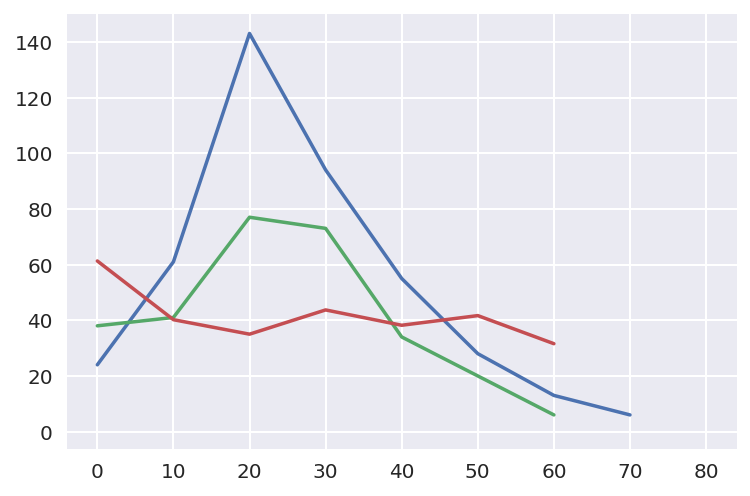

In [38]:
%matplotlib inline
plt.plot(titanic_df2)
plt.show()